### Spam or Ham classification

In [44]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1)Reading the data

In [45]:
df=pd.read_csv(r'SMSSpamCollection_data',sep='\t',names=['Label','message'])  # reading the data here seperator is tab  column labels as names
df.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2) Text preprocessing

In [46]:
df.columns

Index(['Label', 'message'], dtype='object')

In [47]:
# importing libraries
import nltk   #NLP library
import re    #For text processing
from nltk.stem.porter import PorterStemmer   # for stemming of words (to get the stem of words/root word)
from nltk.corpus import stopwords    # to get the list of stop words in required longuage
from nltk.stem import WordNetLemmatizer  # for lemmatization



#===========================cleaning the text================================



ps=PorterStemmer()
l_s=WordNetLemmatizer()
# sentences=nltk.sent_tokenize(paragraph)
corpus=[]

for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i])  #replace all non alphabatic terms by space
    review=review.lower()                       # lower the each sentence
    review=review.split()                       # split the senetence into list of words
    review=[l_s.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]   # Remove stopwords and lemmatize it
    review=' '.join(review)      # join the all words with space
    corpus.append(review)        #append the final cleaned sentence into corpus list
    

# print(corpus)          # Corpus list output

# ============================Creating TF-IDF model==========================

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000) #build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

x=cv.fit_transform(corpus).toarray()
print(len(corpus))
print(x.shape)      
x

5572
(5572, 5000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
# * Now independent feature x is ready


In [49]:
df['Label'].unique()

array(['ham', 'spam'], dtype=object)

In [50]:
y=df['Label'].replace({'ham':0,'spam':1})
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5572, dtype: int64

In [51]:
y.unique()

array([0, 1], dtype=int64)

In [52]:
#  Now the data is ready in erms of x and y

#### 3) Splitting the data

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

#### 4) Fitting the model

In [54]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#### 5) Peformance evaluation of model

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
print('Model accuaracy is',accuracy_score(y_test,y_pred))

Model accuaracy is 0.9662598707824839


In [56]:
confusion_matrix(y_test,y_pred)

array([[1206,    1],
       [  46,  140]], dtype=int64)

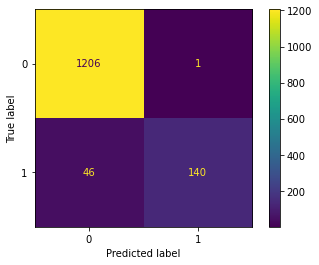

In [57]:
plot_confusion_matrix(model,x_test,y_test,)
plt.show()